In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Numerical Data
import os
os.chdir("C:\\Users\\ajara\\Downloads")
data_1 = pd.read_csv("BSESN.csv")
data_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300.0
1,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400.0
2,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500.0
3,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0
4,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0


In [3]:
# Importing Textual Data
data_2 = pd.read_csv('india-news-headlines.csv')
data_2.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
data_1.shape

(250, 7)

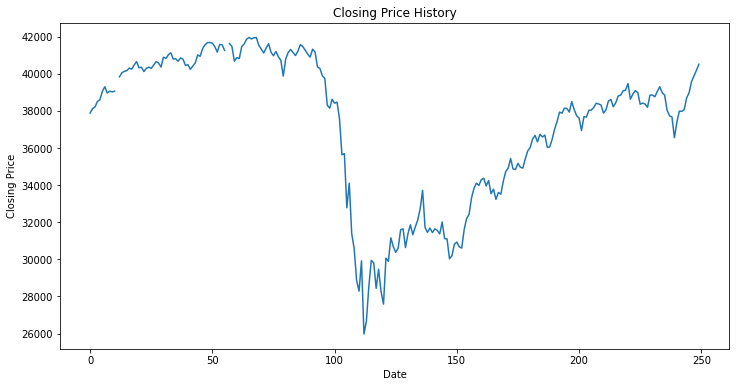

In [5]:
#Visualize the closing price history of sensex
plt.figure(figsize=(12,6))
plt.title('Closing Price History')
plt.plot(data_1['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

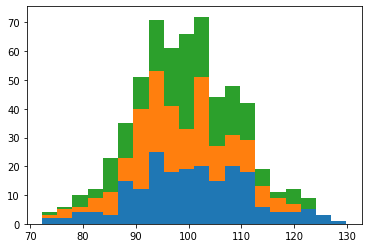

In [6]:
#Stack Graph
a,b = 100,10
x= a + b *np.random.randn(200,3)
n , bins , patches = plt.hist(x, 20,stacked=True)
plt.show()

In [7]:
data_1['Date'] = pd.to_datetime(data_1.Date,format='%Y-%m-%d')
data_1.index = data_1['Date']

In [9]:
#Create a new dataframe with only the 'Close' column
import math
from sklearn.preprocessing import MinMaxScaler
f = data_1.filter(['Close'])
dataset = f.values
training_data_len = math.ceil( len(dataset) *.8)
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
f = scaler.fit_transform(np.array(f).reshape(-1,1))
f.shape

(250, 1)

In [11]:
# Splitting dataset into train and test
training_size = int(len(f)*0.65)
test_size = len(f)-training_size
train_data,test_data = f[0:training_size,:],f[training_size:len(f),:1]

In [12]:
train_data

array([[0.74502966],
       [0.76047476],
       [0.76594645],
       [0.78420542],
       [0.79002198],
       [0.8183896 ],
       [0.8338122 ],
       [0.81286605],
       [0.81881345],
       [0.8164068 ],
       [0.81876527],
       [       nan],
       [0.86721323],
       [0.88098982],
       [0.88582219],
       [0.888075  ],
       [0.89664844],
       [0.89328427],
       [0.907156  ],
       [0.91867391],
       [0.89800389],
       [0.89934809],
       [0.88500873],
       [0.89567918],
       [0.90007522],
       [0.89553585],
       [0.90715086],
       [0.91854257],
       [0.91375471],
       [0.90024545],
       [0.93341854],
       [0.92916533],
       [0.94164443],
       [0.94850435],
       [0.92744399],
       [0.92796763],
       [0.92003327],
       [0.93098034],
       [0.92655372],
       [0.90561369],
       [0.908261  ],
       [0.89276136],
       [0.90357391],
       [0.91416413],
       [0.94096205],
       [0.93651709],
       [0.96240421],
       [0.975

In [14]:
#Converting array to matrix
def dataset(dataset,time_step=1):
    data_x,data_y = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
        
    return np.array(data_x),np.array(data_y)

In [15]:
time_step = 70
x_train,y_train = dataset(train_data,time_step)
x_test,y_test = dataset(test_data,time_step)

In [16]:
print(x_train)

[[0.74502966 0.76047476 0.76594645 ... 0.99874336 0.99954557 0.97347014]
 [0.76047476 0.76594645 0.78420542 ... 0.99954557 0.97347014 0.96062833]
 [0.76594645 0.78420542 0.79002198 ... 0.97347014 0.96062833 0.94757813]
 ...
 [0.95649153 0.94384098 0.93374089 ... 0.40340007 0.45846228 0.49114646]
 [0.94384098 0.93374089 0.9605777  ... 0.45846228 0.49114646 0.50892875]
 [0.93374089 0.9605777  0.95100565 ... 0.49114646 0.50892875 0.50086183]]


In [17]:
print(x_train.shape),print(y_train.shape)

(91, 70)
(91,)


(None, None)

In [18]:
#Reshaping data for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [19]:
data_2.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 50.3+ MB


In [23]:
data_2.shape

(3297172, 3)

In [24]:
#Importing textual dataset
data_3 = pd.read_csv("Combined_News_DJIA.csv")
data_3.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [26]:
#Combine the top news headlines
headlines = []
for row in range(0,len(data_3.index)):
    headlines.append(' '.join(str(x) for x in data_3.iloc[row,2:27]))

In [27]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [28]:
import re

In [29]:
#Cleaning combined data
clean_data = []
for i in range(0, len(headlines)):
  clean_data.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_data[i] = re.sub('b[(")]+', '', clean_data[i] )
  clean_data[i] = re.sub("\'", '', clean_data[i] )

In [30]:
clean_data[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [31]:
#Add the clean headlines to the data set
data_3['Combined_News'] = clean_data

In [32]:
data_3.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

In [33]:
# Checking for null values
data_3.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

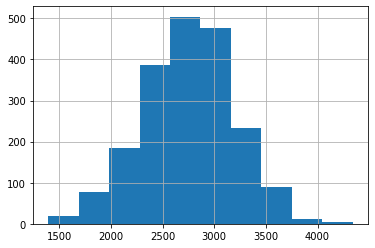

<Figure size 576x432 with 0 Axes>

In [34]:
#Visualizing Text data
data_3['Combined_News'].str.len().hist()
plt.figure(figsize=(8,6))
plt.show()

In [35]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.Collecting vaderSentiment



In [37]:
pip install TextBlob


  Using cached tqdm-4.50.2-py2.py3-none-any.whl (70 kB)
Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'


In [38]:
# Import libraries for sentimental analysis
from textblob import TextBlob
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

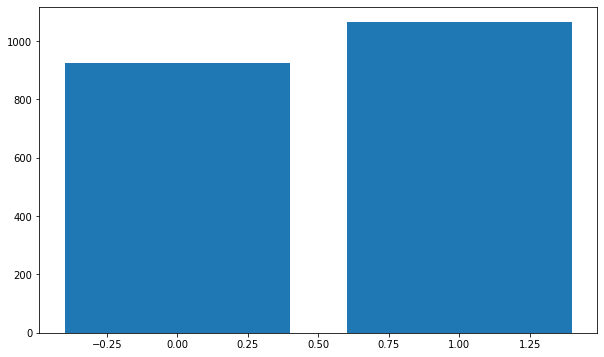

In [48]:
#Visualization of Label
plt.figure(figsize=(10,6))
plt.bar(data_3.Label.value_counts().index,
        data_3.Label.value_counts())
plt.show()

In [87]:
#Create the feature data set
x = data_3.drop('Date', axis=1)
#Create the target data set
y = data_3['Label']

In [65]:
x.shape

(1989, 27)

In [66]:
y.shape

(1989,)

In [67]:
y.value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [68]:
x.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away .

In [69]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [70]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0,stratify=y)

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:
regressor = LinearRegression()

In [81]:
x_train.shape,y_train.shape

((1591, 27), (1591,))

In [85]:
y_test.shape

(398,)